# First Example
(https://towardsdatascience.com/training-a-neural-network-by-hand-1bcac4d82a6e)[Train a Neural Network by Hand]

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

df = pd.DataFrame({
    'x': [0.1, 0.3, 0.6, 0.7],
    'y':[0.2, 0.25, 0.4, 0.7],
})

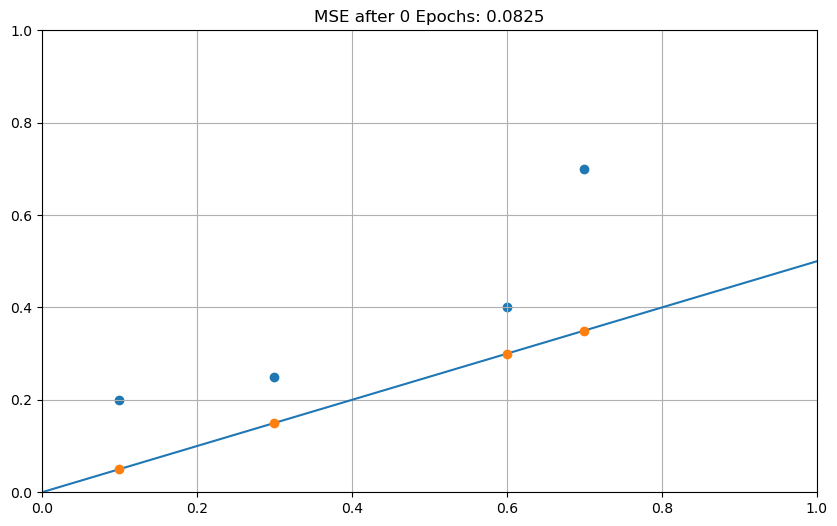

In [36]:

init_w11 = 0.5
init_b11 = 0
init_predictions = [0.05, 0.15, 0.30, 0.35]

fig, ax = plt.subplots(figsize=(10, 6))
ax.axline((0, init_b11), slope=init_w11)
ax.scatter(df['x'], df['y'])
ax.scatter(df['x'], init_predictions, zorder=3)
ax.set_title("MSE after 0 Epochs: {}".format(0.0825))
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.grid()
plt.show()

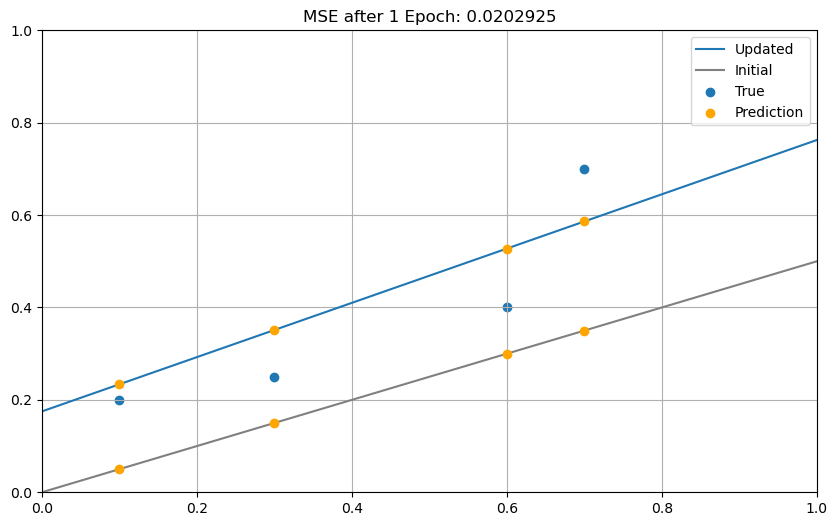

In [37]:
w11 = 0.5875
b11 = 0.175
second_predictions = [0.23375, 0.35125, 0.5275, 0.58625]

fig, ax = plt.subplots(figsize=(10, 6))
ax.axline((0, b11), slope=w11, label="Updated")
ax.axline((0, init_b11), slope=init_w11, c='grey', label='Initial')
ax.scatter(df['x'], df['y'], label="True")
ax.scatter(df['x'], second_predictions, zorder=3, c='orange', label="Prediction")
ax.scatter(df['x'], init_predictions, zorder=3, c='orange')
ax.set_title("MSE after 1 Epoch: {}".format(0.0202925))
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.legend()
ax.grid()
plt.show()

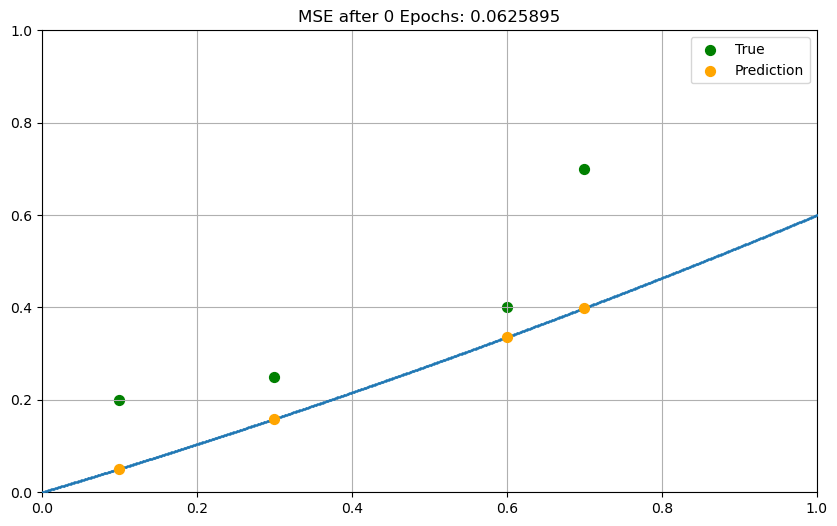

In [38]:

init_predictions = [0.051, 0.159, 0.336, 0.399]

init_w111 = 0.5
init_w112 = 0.1
init_b11 = 0

def forward_pass(x, w111, w112, b11):
    h11 = w111*x + w112*(x*x) + b11
    return h11

line = [forward_pass(i, init_w111, init_w112, init_b11) for i in np.linspace(0,1,1000)]

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(np.linspace(0,1,1000), line, zorder=3, s=1/2)
ax.scatter(df['x'], df['y'], s=50, c='green', label="True")
ax.scatter(df['x'], init_predictions, zorder=3, s=50, c='orange', label="Prediction")
ax.set_title("MSE after 0 Epochs: {}".format(0.0625895))
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.grid()
ax.legend()
plt.show()

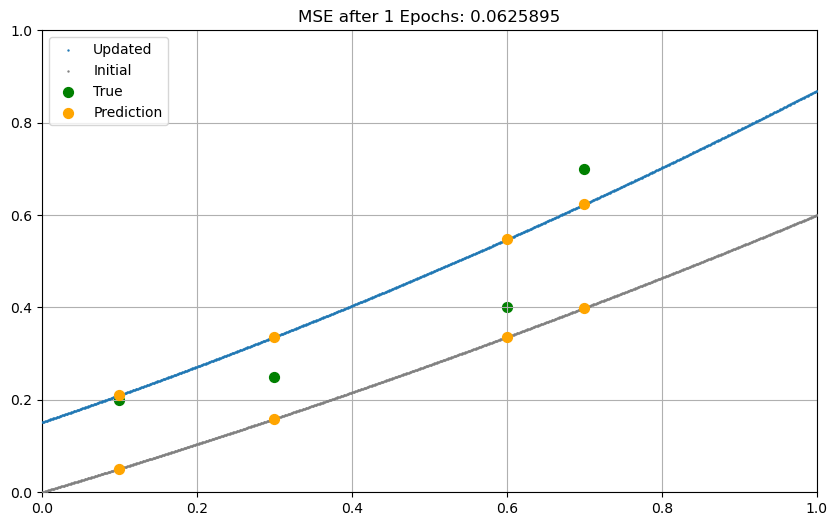

In [39]:

second_predictions = [0.209983, 0.336152, 0.547163, 0.623303]

w111 = 0.572825
w112 = 0.1450525
b11 = 0.15125

def forward_pass(x, w111, w112, b11):
    h11 = w111*x + w112*(x*x) + b11
    return h11

init_line = [forward_pass(i, init_w111, init_w112, init_b11) for i in np.linspace(0,1,1000)]
second_line = [forward_pass(i, w111, w112, b11) for i in np.linspace(0,1,1000)]

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(np.linspace(0,1,1000), second_line, zorder=3, s=1/2,label='Updated')
ax.scatter(np.linspace(0,1,1000), init_line, zorder=3, c='grey', s=1/2, label='Initial')
ax.scatter(df['x'], df['y'], s=50, c='green', label="True")
ax.scatter(df['x'], second_predictions, zorder=3, s=50, c='orange', label="Prediction")
ax.scatter(df['x'], init_predictions, zorder=3, s=50, c='orange')
ax.set_title("MSE after 1 Epochs: {}".format(0.0625895))
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.grid()
ax.legend()
plt.show()

In [40]:
class SimpleNeuralNetwork():
    def __init__(self, X, Y):
        self.w111 = 0.5
        self.w112 = 0.1
        self.b11 = 0
        self.preds = []
        self.lr = 1
        self.X = X
        self.Y = Y
        
    def forward_pass(self):
        self.preds = []
        for x in self.X:
            y_hat = self.w111*x + self.w112*(x*x) + self.b11
            self.preds.append(y_hat)
    
    def calc_error(self):
        # 1/2 * MSE
        return 1/2 * sum([(y - yhat)**2 for y, yhat in zip(self.Y, self.preds)])
        
    def back_prop(self):
        w111s = []
        w112s = []
        b11s = []
        
        # -- Chained partial derivatives --
        for x, y, yhat in zip(self.X, self.Y, self.preds):
            w111s.append((-(y - yhat)) * 1 * (x))
            w112s.append((-(y - yhat)) * 1 * (x**2))
            b11s.append((-(y - yhat)) * 1 * 1)

        w111_change = sum(w111s)/len(w111s)
        w112_change = sum(w112s)/len(w112s)
        b11_change = sum(b11s)/len(b11s)

        # -- Updating weights and biases --
        self.w111 = self.w111 - self.lr * (w111_change)
        self.w112 = self.w112 - self.lr * (w112_change)
        self.b11 = self.b11 - self.lr * (b11_change)
        
    def plot_model(self, epoch, plot_num, nrows, ncols):
        line = [self.w111*i + self.w112*(i*i) + self.b11 for i in np.linspace(0,1,1000)]
        ax = plt.subplot(nrows, ncols, plot_num+1)
        ax.scatter(np.linspace(0,1,1000), line, zorder=3, s=1/2)
        ax.scatter(self.X, self.Y, s=50, c='green', label="True")
        ax.scatter(self.X, self.preds, zorder=3, s=50, c='orange', label="Prediction")
        ax.set_title("Epoch: {}, Error: {:.5f}".format(epoch, self.calc_error()))
        ax.set_xlim([0,1])
        ax.set_ylim([0,1])
        ax.grid()
        ax.legend(loc = "upper left")

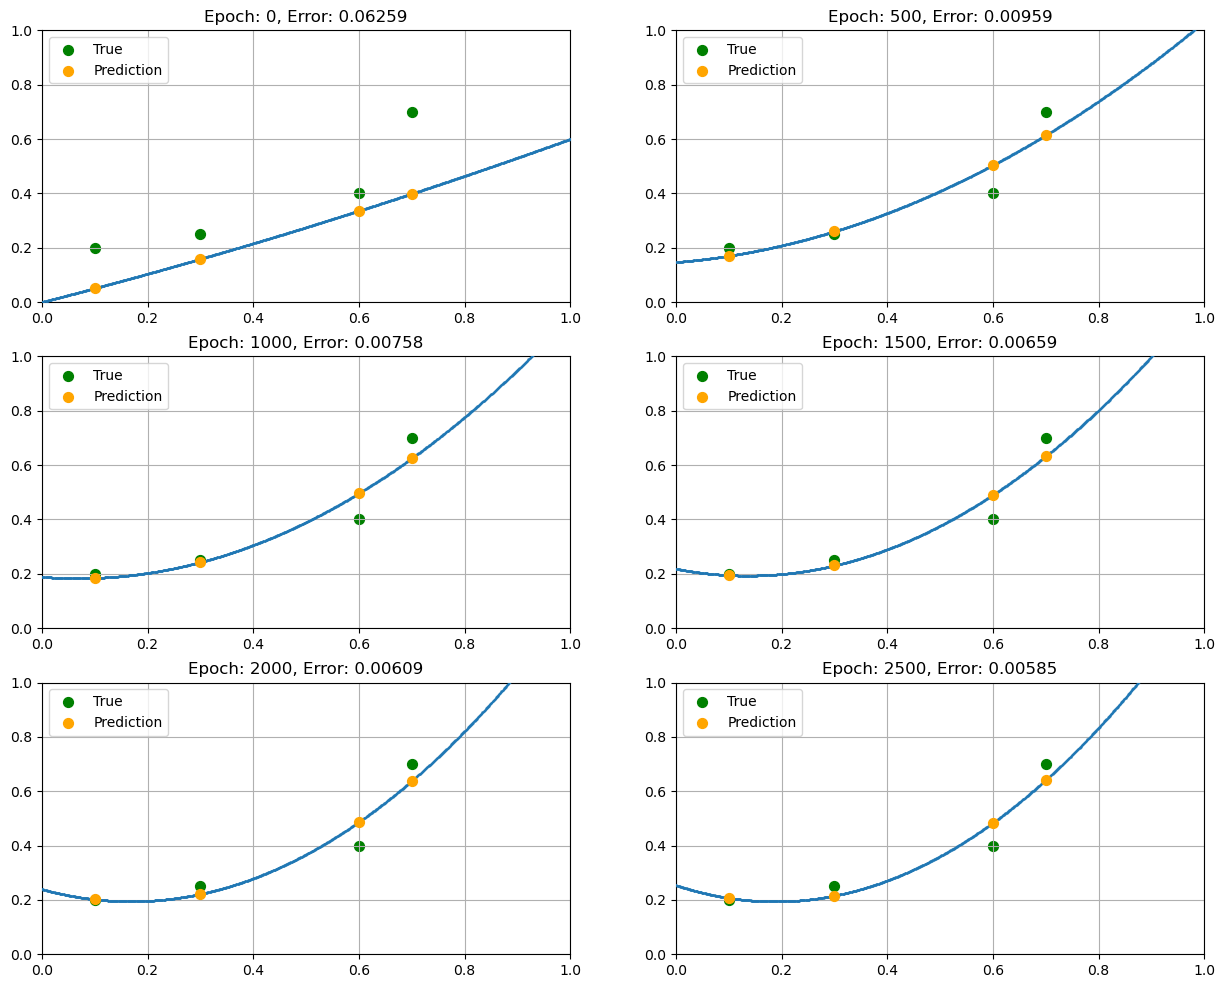

In [41]:

NN = SimpleNeuralNetwork(df['x'].values, df['y'].values)
plot_num = 0
plot_y = 0
fig, ax = plt.subplots(figsize=(15, 12), nrows=3, ncols=2)

for epoch in range(2501):
    NN.forward_pass()
    if epoch%500 == 0:
        NN.plot_model(epoch, plot_num, nrows=3, ncols=2)
        plot_num += 1
        
    NN.back_prop()
    
plt.show()

# Example 2

Step 1: Import Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

Step 2: Generate Synthetic Data

In [2]:
num_samples = 100

# Generate synthetic data: y = 1.5 * x1 - 1.2 * x2
np.random.seed(0)
x1 = np.random.normal(3, 1, num_samples)
x2 = np.random.normal(2, 0.5, num_samples)
y = 1.5 * x1 - 1.2 * x2 + np.random.normal(0, 0.2, num_samples)  # Actual data

# Combine x1 and x2
X = np.column_stack((x1, x2))

Step 3: Initialize Weights

In [4]:
w1, w2 = 0, 0  # Initial weights
learning_rate = 0.01

Step 4: Manual Gradient Descent

In [5]:
def compute_loss(w1, w2, X, y):
    predictions = w1 * X[:, 0] + w2 * X[:, 1]
    loss = np.mean((predictions - y) ** 2)
    return loss

loss_history = []
weight_history = []

for i in range(100):  # Number of iterations
    predictions = w1 * X[:, 0] + w2 * X[:, 1]
    error = predictions - y

    # Compute gradients
    grad_w1 = 2 * np.mean(error * X[:, 0])
    grad_w2 = 2 * np.mean(error * X[:, 1])

    # Update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

    # Record the history
    loss_history.append(compute_loss(w1, w2, X, y))
    weight_history.append((w1, w2))

Step 5: 3D Plot of Gradient Descent

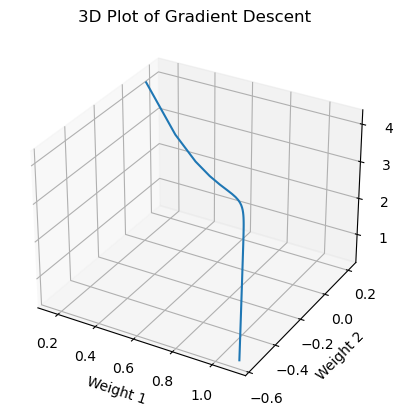

In [6]:
w1_history, w2_history = zip(*weight_history)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(w1_history, w2_history, loss_history)

ax.set_xlabel('Weight 1')
ax.set_ylabel('Weight 2')
ax.set_zlabel('Loss')
ax.set_title('3D Plot of Gradient Descent')
plt.show()

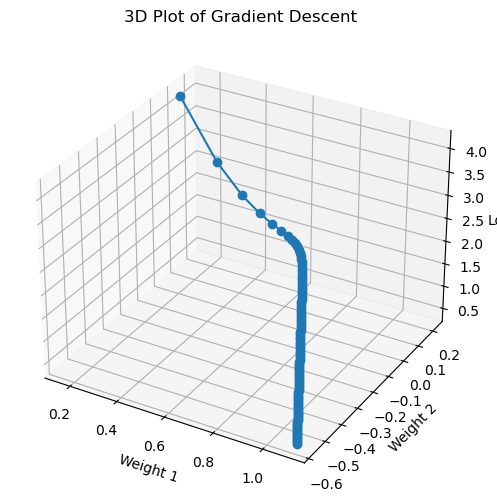

In [15]:

from mpl_toolkits.mplot3d import Axes3D

# Extract the history of weights and loss
w1_history, w2_history = zip(*weight_history)

# Create a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(w1_history, w2_history, loss_history, marker='o')

ax.set_xlabel('Weight 1')
ax.set_ylabel('Weight 2')
ax.set_zlabel('Loss')
ax.set_title('3D Plot of Gradient Descent')

plt.show()

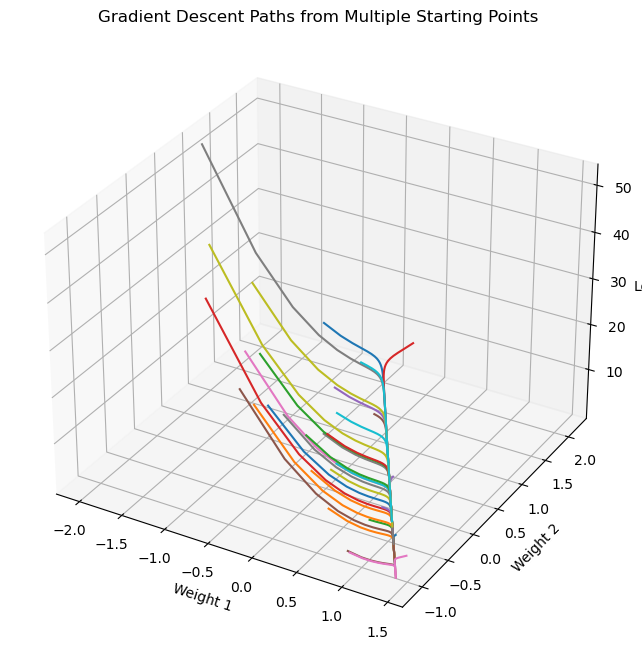

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic data
num_samples = 100
np.random.seed(0)
x1 = np.random.normal(3, 1, num_samples)
x2 = np.random.normal(2, 0.5, num_samples)
y = 1.5 * x1 - 1.2 * x2 + np.random.normal(0, 0.2, num_samples)

X = np.column_stack((x1, x2))

# Compute the loss
def compute_loss(w1, w2, X, y):
    predictions = w1 * X[:, 0] + w2 * X[:, 1]
    loss = np.mean((predictions - y) ** 2)
    return loss

# Perform gradient descent from different starting points
num_runs = 30
learning_rate = 0.01
num_epochs = 100
all_w1_history = []
all_w2_history = []
all_loss_history = []

for run in range(num_runs):
    # Initialize weights randomly
    w1, w2 = np.random.randn(), np.random.randn()
    w1_history, w2_history, loss_history = [], [], []

    for epoch in range(num_epochs):
        predictions = w1 * X[:, 0] + w2 * X[:, 1]
        error = predictions - y

        # Compute gradients
        grad_w1 = 2 * np.mean(error * X[:, 0])
        grad_w2 = 2 * np.mean(error * X[:, 1])

        # Update weights
        w1 -= learning_rate * grad_w1
        w2 -= learning_rate * grad_w2

        # Record history
        w1_history.append(w1)
        w2_history.append(w2)
        loss_history.append(compute_loss(w1, w2, X, y))

    all_w1_history.append(w1_history)
    all_w2_history.append(w2_history)
    all_loss_history.append(loss_history)

# Create a 3D plot showing the paths of gradient descent
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(num_runs):
    ax.plot(all_w1_history[i], all_w2_history[i], all_loss_history[i])

ax.set_xlabel('Weight 1')
ax.set_ylabel('Weight 2')
ax.set_zlabel('Loss')
ax.set_title('Gradient Descent Paths from Multiple Starting Points')
plt.show()


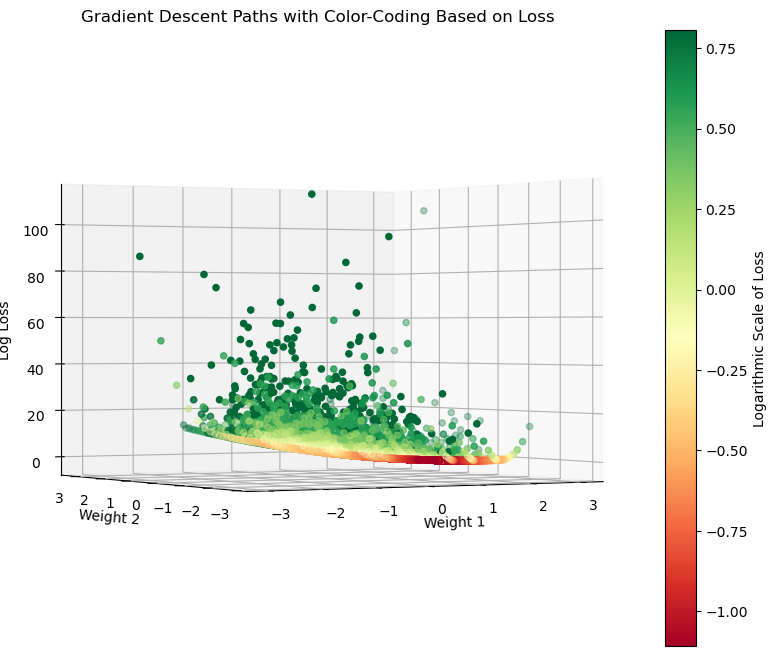

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic data
num_samples = 1000
np.random.seed(0)
x1 = np.random.normal(3, 1, num_samples)
x2 = np.random.normal(2, 0.5, num_samples)
y = 1.5 * x1 - 1.2 * x2 + np.random.normal(0, 0.2, num_samples)

X = np.column_stack((x1, x2))

# Function to compute loss
def compute_loss(w1, w2, X, y):
    predictions = w1 * X[:, 0] + w2 * X[:, 1]
    loss = np.mean((predictions - y) ** 2)
    return loss

# Perform gradient descent
num_runs = 1000
learning_rate = 0.01
num_epochs = 100

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for run in range(num_runs):
    w1, w2 = np.random.randn(), np.random.randn()
    w1_history, w2_history, loss_history = [], [], []

    for epoch in range(num_epochs):
        predictions = w1 * X[:, 0] + w2 * X[:, 1]
        error = predictions - y

        # Compute gradients
        grad_w1 = 2 * np.mean(error * X[:, 0])
        grad_w2 = 2 * np.mean(error * X[:, 1])

        # Update weights
        w1 -= learning_rate * grad_w1
        w2 -= learning_rate * grad_w2

        # Record history
        w1_history.append(w1)
        w2_history.append(w2)
        loss_history.append(compute_loss(w1, w2, X, y))

    # Color-coding based on the log of the loss
    colors = np.log(np.array(loss_history) + 1e-10)  # Adding a small value to avoid log(0)
    sc = ax.scatter(w1_history, w2_history, loss_history, c=colors, cmap='RdYlGn')

ax.set_xlabel('Weight 1')
ax.set_ylabel('Weight 2')
ax.set_zlabel('Log Loss')
ax.set_title('Gradient Descent Paths with Color-Coding Based on Loss')
ax.view_init(elev=0, azim=-120)  # Elevate 90 degrees for top-down view
plt.colorbar(sc, label='Logarithmic Scale of Loss')
plt.show()
